#  Import Package

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.diagnostic import normal_ad

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# <font color='olive'>Bank Additional.csv

##  <font color='maroon'>Data Overview

In [2]:
df = pd.read_csv('bank-additional.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

Data numerical: age, duration, campaign, pdays, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed  <br>
Data categorical: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, dan y

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.duplicated().sum()

0

## <font color='maroon'>  Encoding Data Columns

Data categorical: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome, dan y

In [6]:
df1 = df.drop(['month','day_of_week'], axis=1)

In [7]:
le = preprocessing.LabelEncoder()
df1['job_dummy']= le.fit_transform(df1['job'])
df1['marital_dummy']= le.fit_transform(df1['marital'])
df1['education_dummy']= le.fit_transform(df1['education'])
df1['default_dummy']= le.fit_transform(df1['default'])
df1['housing_dummy']= le.fit_transform(df1['housing'])
df1['loan_dummy']= le.fit_transform(df1['loan'])
df1['contact_dummy']= le.fit_transform(df1['contact'])
df1['poutcome_dummy']= le.fit_transform(df1['poutcome'])
df1['y_dummy']= le.fit_transform(df1['y'])
df1

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,y,job_dummy,marital_dummy,education_dummy,default_dummy,housing_dummy,loan_dummy,contact_dummy,poutcome_dummy,y_dummy
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,487,2,...,no,1,1,2,0,2,0,0,1,0
1,39,services,single,high.school,no,no,no,telephone,346,4,...,no,7,2,3,0,0,0,1,1,0
2,25,services,married,high.school,no,yes,no,telephone,227,1,...,no,7,1,3,0,2,0,1,1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,17,3,...,no,7,1,2,0,1,1,1,1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,58,1,...,no,0,1,6,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,53,1,...,no,0,1,1,0,2,2,0,1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,219,1,...,no,0,1,3,0,2,0,1,1,0
4116,27,student,single,high.school,no,no,no,cellular,64,2,...,no,8,2,3,0,0,0,0,0,0
4117,58,admin.,married,high.school,no,no,no,cellular,528,1,...,no,0,1,3,0,0,0,0,1,0


## <font color='maroon'> Split Data

Split data menjadi data training dan testing. Data Training sebesar 85% dan Data Testing sebesar 15%.

In [8]:
train, test = train_test_split(df1, test_size=0.15, random_state=5)
train_index = train.index
test_index = test.index

In [9]:
x = train[['age','job_dummy','marital_dummy','education_dummy','default_dummy',
           'housing_dummy','loan_dummy','contact_dummy',
           'duration','campaign','pdays','previous','poutcome_dummy',
           'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m',
           'nr.employed']]
y = train[['y_dummy']]

In [10]:
xtest = test[['age','job_dummy','marital_dummy','education_dummy','default_dummy',
              'housing_dummy','loan_dummy','contact_dummy','duration','campaign',
              'pdays','previous','poutcome_dummy','emp.var.rate',
              'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
ytest = test[['y_dummy']]

## <font color='maroon'>Scale Data

In [11]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
xtest = scaler.transform(xtest)

###  <font color='darkgoldenrod'> A. Logistic Regression

####  Training Data

In [12]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [13]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [14]:
print(model.intercept_)
print(model.coef_)

[-3.08697213]
[[ 0.05845768  0.05933025  0.11239063  0.09158494  0.025659   -0.00487659
  -0.04066405 -0.49450315  1.24047748 -0.1338979  -0.14886107  0.02869876
   0.22070206 -1.24344356  0.93977836  0.40726928 -0.64993736  0.40529413]]


In [15]:
model.score(x,y)

0.9140245644101685

**Tingkat akurasi dengan data training dari model di atas adalah 91,40%**

#### <font color='cornflowerblue'>Confusion Matrix

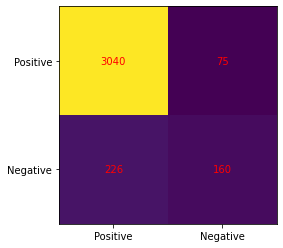

In [16]:
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

**Confusion matrix di atas menunjukkan bahwa True Positive (3040) > False Positive (75), tetapi False Negative (226) > True Negative (160).**

#### <font color='cornflowerblue'>Classification Report

In [17]:
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3115
           1       0.68      0.41      0.52       386

    accuracy                           0.91      3501
   macro avg       0.81      0.70      0.73      3501
weighted avg       0.90      0.91      0.90      3501



#### Testing Data

In [18]:
model.score(xtest,ytest)

0.9223300970873787

**Tingkat akurasi dengan data testing dari model di atas adalah 92,23%**

#### <font color='cornflowerblue'>Confusion Matrix

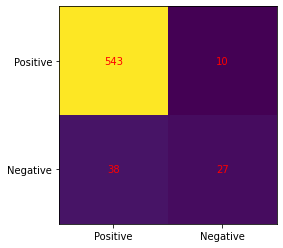

In [19]:
cm = confusion_matrix(ytest, model.predict(xtest))
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

**Confusion matrix di atas menunjukkan bahwa True Positive > False Positive, tetapi False Negative > True Negative.**

#### <font color='royalblue'> COMPARISON

In [20]:
compare = pd.DataFrame({'Data':['Training Data','Testing Data'],'Tingkat Akurasi':[model.score(x,y), model.score(xtest, ytest)]})
compare

,Data,Tingkat Akurasi
0,Training Data,0.914025
1,Testing Data,0.922330


**Karena tingkat akurasi pada training data lebih rendah daripada testing data, maka model ini termasuk "Overfitting"**

###  <font color='darkgoldenrod'> B. K-Nearest Neighbors

In [21]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y)
    pred_i = knn.predict(xtest)
    error.append(np.mean(pred_i != ytest['y_dummy'].to_list()))

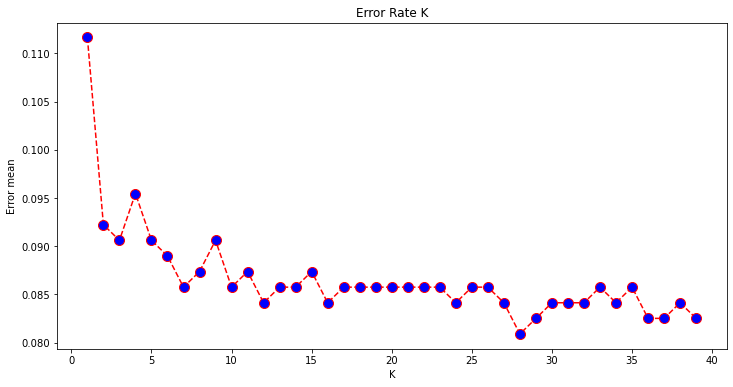

In [22]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red',linestyle='dashed',marker='o', markerfacecolor='blue',markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')
plt.show()

**Titik dimana terdapat error terkecil adalah pada saat K = 28**

#### <font color='cornflowerblue'>K = 28

In [23]:
knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=28)

In [24]:
y_predb = knn.predict(xtest)
y_predb

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
print('Accuracy:', metrics.accuracy_score(ytest, y_predb))

Accuracy: 0.919093851132686


**Tingkat akurasi dari model di atas adalah 91,91%**

#### <font color='cornflowerblue'>Confusion Matrix

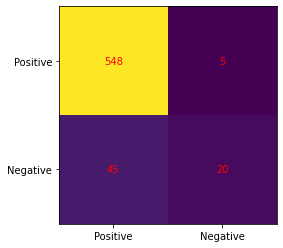

In [26]:
cm = confusion_matrix(ytest, y_predb)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

**Confusion matrix di atas menunjukkan bahwa True Positive > False Positive, tetapi False Negative > True Negative.**

###  <font color='darkgoldenrod'> C. Support Vector Machine

In [27]:
clf = svm.SVC(kernel='linear')
clf.fit(x, y)

SVC(kernel='linear')

In [28]:
y_predc =clf.predict(xtest)
print('Accuracy:', metrics.accuracy_score(ytest, y_predc))

Accuracy: 0.919093851132686


**Tingkat akurasi dari model di atas adalah 91,91%**

#### <font color='cornflowerblue'>Confusion Matrix

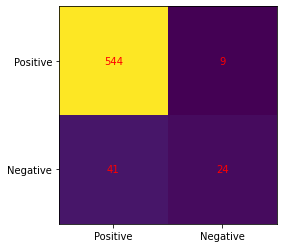

In [29]:
cm = confusion_matrix(ytest, y_predc)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

**Confusion matrix di atas menunjukkan bahwa True Positive > False Positive, tetapi False Negative > True Negative.**

###  <font color='darkgoldenrod'> D. Decision Tree

In [30]:
dt = DecisionTreeClassifier()
dt = dt.fit(x, y)

In [31]:
y_predd =dt.predict(xtest)

In [32]:
print('Accuracy:', metrics.accuracy_score(ytest, y_predd))

Accuracy: 0.8754045307443366


**Tingkat akurasi dari model di atas adalah 87,86%**

In [33]:
dt1 = DecisionTreeClassifier(criterion="entropy",max_depth = 4)
dt1 = dt1.fit(x, y)
y_predd1 =dt1.predict(xtest)

In [34]:
print('Accuracy:', metrics.accuracy_score(ytest, y_predd1))

Accuracy: 0.9223300970873787


Max Depth Accuracy
- 1 = 0.8948220064724919
- 2 = 0.919093851132686
- 3 = 0.9077669902912622
- 4 = 0.9223300970873787
- 5 = 0.919093851132686

**Tingkat akurasi dari model di atas dengan Max Depth = 4 adalah 92,23%**

#### <font color='cornflowerblue'>Confusion Matrix

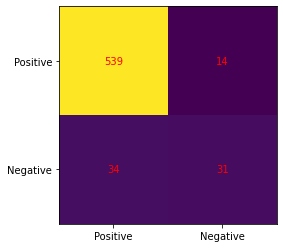

In [35]:
cm = confusion_matrix(ytest, y_predd1)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

**Confusion matrix di atas menunjukkan bahwa True Positive > False Positive, tetapi False Negative > True Negative.**

###  <font color='darkgoldenrod'> E. Random Forest

In [36]:
rf = RandomForestClassifier()
rf.fit(x,y)
y_prede = rf.predict(xtest)

In [37]:
print('Accuracy:', metrics.accuracy_score(ytest, y_prede))

Accuracy: 0.9207119741100324


**Tingkat akurasi dari model di atas adalah 91,91%**

#### <font color='cornflowerblue'>Confusion Matrix

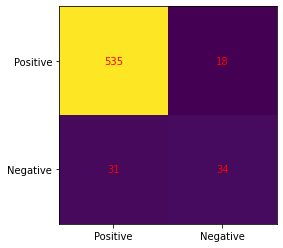

In [38]:
cm = confusion_matrix(ytest, y_prede)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

**Confusion matrix di atas menunjukkan bahwa True Positive > False Positive, tetapi False Negative < True Negative.**

###  <font color='darkgoldenrod'> F. Naive Bayes

In [39]:
gnb = GaussianNB()
gnb.fit(x,y)

GaussianNB()

In [40]:
y_predf =gnb.predict(xtest)

In [41]:
print('Accuracy:', metrics.accuracy_score(ytest, y_predf))

Accuracy: 0.872168284789644


**Tingkat akurasi dari model di atas adalah 87,22%**

#### <font color='cornflowerblue'>Confusion Matrix

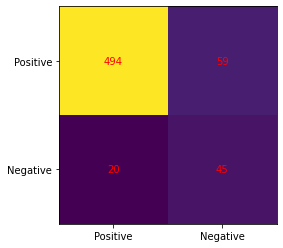

In [42]:
cm = confusion_matrix(ytest, y_predf)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

**Confusion matrix di atas menunjukkan bahwa True Positive > False Positive dan False Negative < True Negative.**

##  <font color='maroon'>Models Comparing

In [43]:
models_comparing = pd.DataFrame({'Model':['Logistic Regression','KNN (k=19)', 'SVM',
                                            'Decision Tree','Random Forest','Naive Bayes'],
                               'Tingkat Akurasi':[model.score(xtest, ytest),metrics.accuracy_score(ytest,y_predb),
                                          metrics.accuracy_score(ytest, y_predc),metrics.accuracy_score(ytest, y_predd1),
                                          metrics.accuracy_score(ytest, y_prede),metrics.accuracy_score(ytest, y_predf)]})
models_comparing

,Model,Tingkat Akurasi
0,Logistic Regression,0.922330
1,KNN (k=19),0.919094
2,SVM,0.919094
3,Decision Tree,0.922330
4,Random Forest,0.920712
5,Naive Bayes,0.872168


**Tingkat akurasi terbesar terdapat pada model "Logistic Regression" dan "Decision Tree" dengan Max Depth = 8. Akan tetapi, karena model "Logistic Regression" mengalami "Overfitting", kita akan menggunakan model "Decision Tree" untuk data Bank Additional Full**

# <font color='olive'>Bank Additional Full.csv

##  <font color='maroon'>Data Overview

In [44]:
df2 = pd.read_csv('bank-additional-full.csv', sep=';')
df2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [45]:
df2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [46]:
df2.duplicated().sum()

12

Terdapat 12 data yang terduplikasi dalam dataset tersebut

In [47]:
df2.loc[df2.duplicated(keep='first'),:]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [48]:
df2.drop_duplicates(inplace=True)

Duplikat-duplikat data tersebut telah diremove

## <font color='maroon'>  Encoding Data Columns

In [49]:
df3 = df2.drop(['month','day_of_week'], axis=1)

In [50]:
le1 = preprocessing.LabelEncoder()
df3['job_dummy']= le.fit_transform(df3['job'])
df3['marital_dummy']= le.fit_transform(df3['marital'])
df3['education_dummy']= le.fit_transform(df3['education'])
df3['default_dummy']= le.fit_transform(df3['default'])
df3['housing_dummy']= le.fit_transform(df3['housing'])
df3['loan_dummy']= le.fit_transform(df3['loan'])
df3['contact_dummy']= le.fit_transform(df3['contact'])
df3['poutcome_dummy']= le.fit_transform(df3['poutcome'])
df3['y_dummy']= le.fit_transform(df3['y'])
df3

,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,y,job_dummy,marital_dummy,education_dummy,default_dummy,housing_dummy,loan_dummy,contact_dummy,poutcome_dummy,y_dummy
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,...,no,3,1,0,0,0,0,1,1,0
1,57,services,married,high.school,unknown,no,no,telephone,149,1,...,no,7,1,3,1,0,0,1,1,0
2,37,services,married,high.school,no,yes,no,telephone,226,1,...,no,7,1,3,0,2,0,1,1,0
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,...,no,0,1,1,0,0,0,1,1,0
4,56,services,married,high.school,no,no,yes,telephone,307,1,...,no,7,1,3,0,0,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,334,1,...,yes,5,1,5,0,2,0,0,1,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,383,1,...,no,1,1,5,0,0,0,0,1,0
41185,56,retired,married,university.degree,no,yes,no,cellular,189,2,...,no,5,1,6,0,2,0,0,1,0
41186,44,technician,married,professional.course,no,no,no,cellular,442,1,...,yes,9,1,5,0,0,0,0,1,1


## <font color='maroon'> Split Data

Split data menjadi data training dan testing. Data Training sebesar 85% dan Data Testing sebesar 15%.

In [51]:
train1, test1 = train_test_split(df3, test_size=0.15, random_state=5)
train_index1 = train.index
test_index1 = test.index

In [52]:
x1 = train1[['age','job_dummy','marital_dummy','education_dummy','default_dummy',
           'housing_dummy','loan_dummy','contact_dummy',
           'duration','campaign','pdays','previous','poutcome_dummy',
           'emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m',
           'nr.employed']]
y1 = train1[['y_dummy']]

In [53]:
xtest1 = test1[['age','job_dummy','marital_dummy','education_dummy','default_dummy',
              'housing_dummy','loan_dummy','contact_dummy','duration','campaign',
              'pdays','previous','poutcome_dummy','emp.var.rate',
              'cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
ytest1 = test1[['y_dummy']]

## <font color='maroon'>Scale Data

In [54]:
scaler = StandardScaler()
x1 = scaler.fit_transform(x1)
xtest1 = scaler.transform(xtest1)

### <font color='darkgoldenrod'>Decision Tree

In [55]:
dt2 = DecisionTreeClassifier()
dt2 = dt2.fit(x1, y1)

In [56]:
y_predd2 =dt2.predict(xtest1)

In [57]:
print('Accuracy:', metrics.accuracy_score(ytest1, y_predd2))

Accuracy: 0.8850574712643678


**Tingkat akurasi dari model di atas adalah 88,38%**

In [58]:
dt2 = DecisionTreeClassifier(criterion="entropy",max_depth = 8)
dt2 = dt2.fit(x1, y1)
y_predd3 =dt2.predict(xtest1)

In [59]:
print('Accuracy:', metrics.accuracy_score(ytest1, y_predd3))

Accuracy: 0.9124170309211591


Max Depth Accuracy
- 1 = 0.8891047434029464
- 2 = 0.9007608871620528
- 3 = 0.9007608871620528
- 4 = 0.9062651772705197
- 5 = 0.9098267767524688
- 6 = 0.9112837947223571
- 7 = 0.9119313582645298
- 8 = 0.9124170309211591
- 9 = 0.9090173223247531

**Tingkat akurasi dari model di atas dengan Max Depth = 8 adalah 91,24%**

#### <font color='cornflowerblue'>Confusion Matrix

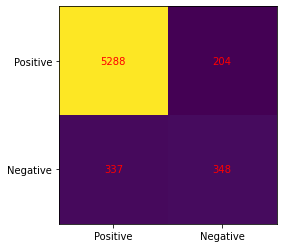

In [60]:
cm = confusion_matrix(ytest1, y_predd3)
fig, ax = plt.subplots(figsize=(4,4))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Positive','Negative'))
ax.set_ylim(1.5,-0.5)

for i in range(2):
    for j in range(2):
        ax.text(j,i, cm[i,j], ha='center',va='center',color='red')

plt.show()

**Confusion matrix di atas menunjukkan bahwa True Positive > False Positive, tetapi False Negative > True Negative.**

# <font color='olive'>Data Visualizing

## <font color='maroon'>Kejadian Gagal Contact Per Bulan

In [61]:
dv = df2[df2['y']=='no']
dv

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no


In [62]:
d = dv[['month','y']].groupby(['month'],as_index=True).agg({'y':'count'}, index=False).sort_values(by='y', ascending=False)
d

,y
month,
may,12881
jul,6521
aug,5521
jun,4759
nov,3684
apr,2092
oct,402
sep,314
mar,270


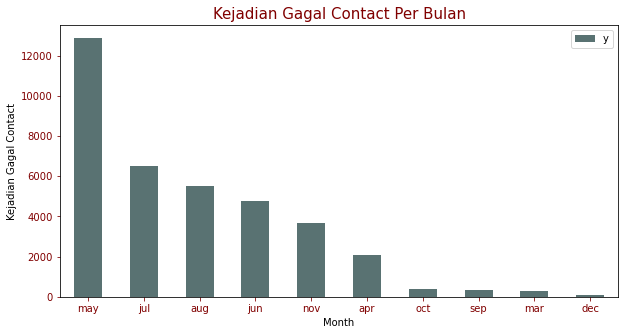

In [63]:
d.plot(kind='bar',figsize=(10,5),rot=0,color=['darkslategray'],alpha=0.8)
plt.xlabel('Month')
plt.ylabel('Kejadian Gagal Contact')
plt.title('Kejadian Gagal Contact Per Bulan', loc='center',size ='15',color='maroon')
plt.tick_params(colors='maroon', which='both')

**Bulan dengan kejadian gagal contact terbanyak adalah Mei sedangkan yang tersedikit adalah Desember**

## <font color='maroon'>Job yang Paling Banyak Subscribed A Term Deposit

In [64]:
dv2 = df2[df2['y']=='yes']
dv2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [65]:
from wordcloud import WordCloud, STOPWORDS

In [66]:
stopwords = set(STOPWORDS)

In [67]:
wc = WordCloud(background_color = 'white',stopwords=stopwords).generate(str(dv2.job.values))

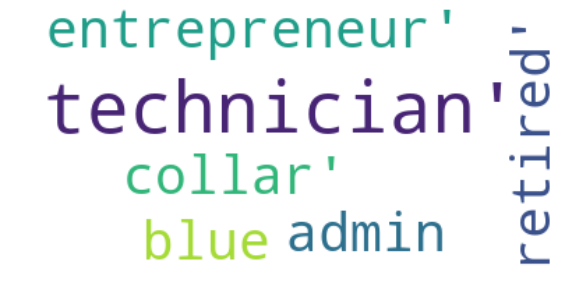

In [68]:
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(8)
plt.imshow(wc, interpolation ='bilinear')
plt.axis('off')
plt.show()

**Jenis Pekerjaan yang paling banyak subscribed a term deposit adalah Technician**

# <font color='olive'>Conclusion

**Model yang paling sesuai untuk data Bank Additional dan Bank Additional Full adalah Decision Tree dengan max depthnya masing masing.**